<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2> <font color="blue"> Solution for </font>Quantum Tomography</h2>

<a id="task1"></a>
<h3> Task 1</h3>

You are given 1000 copies of an arbitrary quantum state which lies in the first or second quadrant of the unit circle.

This quantum state can be represented by an angle $ \theta \in [0,180) $.

<i>Please execute the following cell, but do not check the value of $\theta$.</i>

In [9]:
from random import randrange
from math import pi
 
theta = randrange(18000)/18000 * pi

2.4633577062647967


Your task is to guess this quantum state by writing quantum programs.

We assume that the quantum state is given to us with the following code. 

    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

    # we define a quantum circuit with one qubit and one bit
    qreg2 =  QuantumRegister(1) # quantum register with a single qubit
    creg2 = ClassicalRegister(1) # classical register with a single bit
    circuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers

    # rotate the qubit with rotation_angle
    circuit2.ry(2*theta,qreg2[0])

You should write further codes without using variable $theta$ again.

You may use measurements or further $ry$-gates.

You can use 1000 shots in total when executing your quantum programs (you can have more than one program starting with the above code).

After your guess, please check the actual value and calculate your error in percentage.

<h3> Solution </h3>

<b>Step 1:</b>

We define a measurement and execute the circuit 100 times.

Then, we check the number of 1s, say $ N $.

We expect $ \sin^2(\theta) \approx N/100 $.

In the other words, $ \theta \approx sin^{-1} \mypar{ \sqrt{ \frac{n}{100} } } = arcsin \mypar{ \sqrt{ \frac{n}{100} } }  $. 

In [3]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

# we define a quantum circuit with one qubit and one bit
qreg1 =  QuantumRegister(1) # quantum register with a single qubit
creg1 = ClassicalRegister(1) # classical register with a single bit
circuit1 = QuantumCircuit(qreg1,creg1) # quantum circuit with quantum and classical registers

# rotate the qubit with theta
circuit1.ry(2*theta,qreg1[0]) 

circuit1.measure(qreg1,creg1)

In [4]:
# execute the program 100 times
job = execute(circuit1,Aer.get_backend('qasm_simulator'),shots=100)

counts = job.result().get_counts(circuit1)

number_of_ones = 0
if '1' in counts:
    number_of_ones = counts['1']
print("the number of observed ones",number_of_ones)

# import asin (inverse of sine function) from math
from math import asin

theta1 = asin((number_of_ones/100)**0.5)

print("theta1 is",theta1)

the number of observed ones 68
theta1 is 0.9695321101157683


<b>Step 2:</b>

Remark that $ \sin (\theta) = \sin(\pi - \theta) $. So, we have two candidates: $\theta_1$ or $ \theta_2 = \pi - \theta_1 $.

0.9695321101157683
2.172060543474025


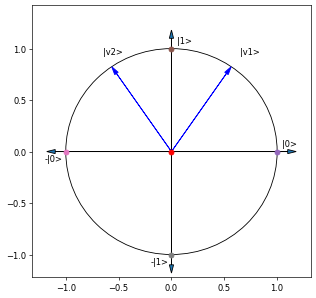

In [11]:
# draw the quantum state

%run qlatvia.py

draw_qubit()

theta2 = pi - theta1

from math import cos,sin

quantum_state1 = [ cos(theta1),sin(theta1) ]
quantum_state2 = [ cos(theta2),sin(theta2) ]

draw_quantum_state(quantum_state1[0],quantum_state1[1],"|v1>")
draw_quantum_state(quantum_state2[0],quantum_state2[1],"|v2>")
print(theta1)
print(theta2)

How can we distinguish them? 

Consider the following two cases:
<ul>
    <li> rotation with angle $ \theta - \theta_1 $ and </li>
    <li> rotation with angle $ \theta + \theta_1 $. </li>
</ul>

If $ \theta_1 \approx \theta $, then we expect to see more 0s in the first case.

If $ \theta_2 \approx \theta $, then we expect to see more 0s in the second case.

In [6]:
# case 1

qreg2 =  QuantumRegister(1) # quantum register with a single qubit
creg2 = ClassicalRegister(1) # classical register with a single bit
circuit2 = QuantumCircuit(qreg2,creg2) # quantum circuit with quantum and classical registers

# rotate the qubit with theta
circuit2.ry(2*theta,qreg2[0]) 
# rotate the qubit with -theta1
circuit2.ry(-2*theta1,qreg2[0]) 

circuit2.measure(qreg2,creg2)

# execute the program 100 times
job = execute(circuit2,Aer.get_backend('qasm_simulator'),shots=100)

counts = job.result().get_counts(circuit2)

case_1 = 0
if '0' in counts:
    case_1 = counts['0']
print("the number of observed 0s in the first case is",case_1)

the number of observed 0s in the first case is 25


In [7]:
# case 2

qreg3 =  QuantumRegister(1) # quantum register with a single qubit
creg3 = ClassicalRegister(1) # classical register with a single bit
circuit3 = QuantumCircuit(qreg3,creg3) # quantum circuit with quantum and classical registers

# rotate the qubit with theta
circuit3.ry(2*theta,qreg3[0]) 
# rotate the qubit with +theta1
circuit3.ry(+2*theta1,qreg3[0])

circuit3.measure(qreg3,creg3)

# execute the program 100 times
job = execute(circuit3,Aer.get_backend('qasm_simulator'),shots=100)

counts = job.result().get_counts(circuit3)

case_2 = 0
if '0' in counts:
    case_2 = counts['0']
print("the number of observed 0s in the second case is",case_2)

the number of observed 0s in the second case is 100


In [8]:
if case_1 > case_2:
    print("theta should be in the first quadrant")
else:
    print("theta should be in the second quadrant")

theta should be in the second quadrant


<b>Step 3:</b>

We can use the remaining 700 shots to make a better approximation of $\theta$.

We simply execute the first circuit with 700 shots.

In [ ]:
# execute the program 700 times
total_shots = 700
job = execute(circuit1,Aer.get_backend('qasm_simulator'),shots=total_shots)

counts = job.result().get_counts(circuit1)

number_of_ones = 0
if '1' in counts:
    number_of_ones = counts['1']
print("the number of observed ones",number_of_ones)

# import asin (inverse of sine function) from math
from math import asin

theta_guess = asin((number_of_ones/total_shots)**0.5)

if case_1 < case_2:
    theta_guess = pi - theta_guess

print("our guess is",theta_guess)
print("original theta is",theta)

error_in_percentage = abs(theta_guess-theta)/theta*100
print("error is",error_in_percentage,"%")